
# 6.2 ODE with more than one variable
We will try to solve equations like 

$ \dfrac{dx}{dt} = f_x(x,y,t) \;\;\; ,\;\;\; \dfrac{dy}{dt} = f_y(x,y,t)$

Or, in arbitrary notation, $\dfrac{d\vec{r}}{dt} = \vec{f}(\vec{r},t)$

We can taylor expand $\vec{r}$ as $\vec{r}(t+h) = \vec{r}(t) + h \dfrac{d \vec{r}}{dt} + O(h^2) = \vec{r}(t) + h \vec{f}(\vec{r}, t) + O(h^2)$  


We have a generalization for the 4th order Runge Kutta method in vector way: 

$\vec{k_1} = h \vec{f}(\vec{r}, t)$ <br>
$\vec{k_2} = h \vec{f}(\vec{r} + \dfrac{1}{2} \vec{k_2} , t + \dfrac{1}{2} h )$  <br>
$ \vec{k_3} = h \vec{f} (\vec{r} + \dfrac{1}{2} \vec{k_2} , t + \dfrac{1}{2} h) $ <br>
$ \vec{k_4} = h \vec{f}(\vec{r} + \vec{k_3} , t + h) $ <br>

$\vec{r} (t+h) = \vec{r}(t) + \dfrac{1}{6} (\vec{k}_1 + 2 \vec{k}_2 + 2 \vec{k}_3 + \vec{k}_4)$

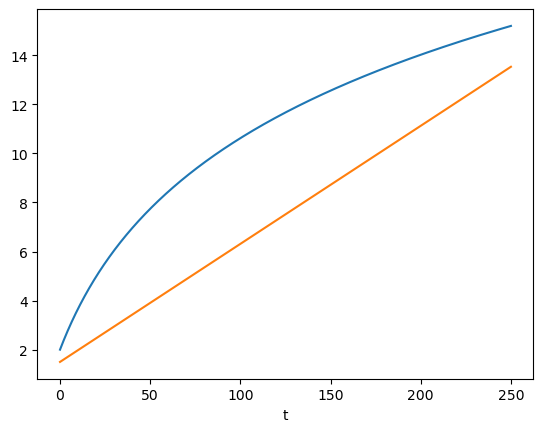

In [18]:
## Example Solve the diff equations with x(t=0)=y(t=0)=1

from math import sin
from numpy import array,arange
from pylab import plot,xlabel,show
import numpy as np

p0 = 1.5
q0 = 2
al = 3
m= 4
H = p0**2/(2*m)*np.exp(-q0/al)

def f(r,t):
    x = r[0]
    y = r[1]
    #fx = x*y - x
    #fy = y - x*y + sin(t)**2
    
    fx = y/m * np.exp(-x/al)
    fy = y**2/(2*m*al) * np.exp(-x/al)
    
    return array([fx,fy],float)

a = 0.0
b = 250.0
N = 20000
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []
ypoints = []

#initial values
r = array([q0,p0],float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
plot(tpoints,xpoints)
plot(tpoints,ypoints)
xlabel("t")
show()

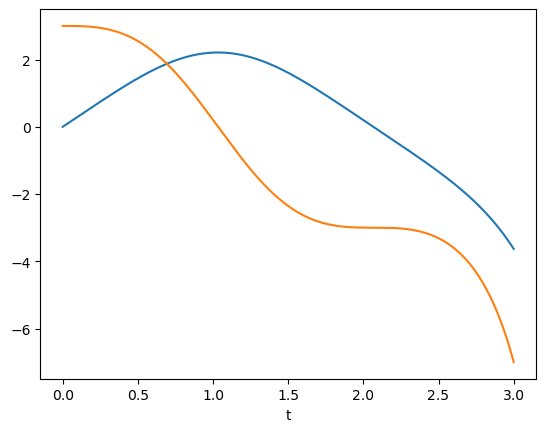

In [17]:
## Example Solve the diff equations with x(t=0)=y(t=0)=1

from math import sin
from numpy import array,arange
from pylab import plot,xlabel,show
import numpy as np

u=3
m= 4
k = 5

def f(r,t):
    x = r[0]
    xp = r[1]
    #fx = x*y - x
    #fy = y - x*y + sin(t)**2
    
    fx = xp
    fxp = -k/m*x**2
    
    return array([fx,fxp],float)

a = 0.0
b = 3
N = 20000
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []
ypoints = []

#initial values
r = array([0,u],float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
plot(tpoints,xpoints)
plot(tpoints,ypoints)
xlabel("t")
show()

In [16]:
max(xpoints)

2.2104188869129398

In [18]:
(3/2*m*u**2/k)**(1/3)

2.2104188991842317

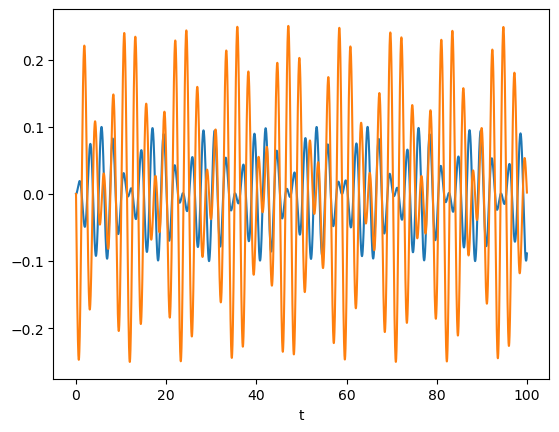

In [1]:
## Example Solve the diff equations with x(t=0)=y(t=0)=1

from math import sin
from numpy import array,arange
from pylab import plot,xlabel,show
import numpy as np

l = 2
m = 3
k = 4
g = 10

def f(r,t):
    x = r[0]
    xp = r[1]
    y = r[2]
    yp = r[3]
    #fx = x*y - x
    #fy = y - x*y + sin(t)**2
    
    fx = xp
    fxp = 1/(m*l**2)*(-(l*m*g+k*l**2)*x + k*l**2*y)
    fy = yp
    fyp = 1/(m*l**2)*(-(l*m*g+k*l**2)*y + k*l**2*x)
    
    return array([fx,fxp,fy,fyp],float)

a = 0.0
b = 100.0
N = 20000
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []
ypoints = []


#initial values
r = array([0,0,0.1,0], float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[3])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
plot(tpoints,xpoints)
plot(tpoints,ypoints)
xlabel("t")
show()

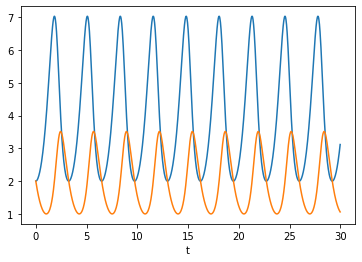

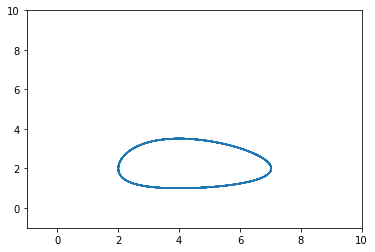

In [2]:
## Example Solve Lotka Volterra with x(t=0)=y(t=0)=2
# t = 0 to t = 30

from math import sin
from numpy import array,arange
from pylab import plot,xlabel,show,ylim,xlim

al = 2
bl = 1
g = 0.5
d = 2


def f(r,t):
    x = r[0]
    y = r[1]
    fx = al*x - bl *x*y
    fy = g*x*y - d *y
    return array([fx,fy],float)

a = 0.0
b = 30.0
N = 1000
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []
ypoints = []

#initial values
r = array([2,2],float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
plot(tpoints,xpoints)
plot(tpoints,ypoints)
xlabel("t")
show()
plot(xpoints,ypoints)
xlim(-1,10)
ylim(-1,10)

show()

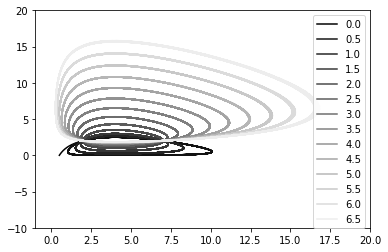

In [3]:
from math import sin
from numpy import array,arange
from pylab import plot,xlabel,show,ylim,xlim
from matplotlib import pyplot as plt

for al in arange(0,7,0.5):
    bl = 1
    g = 0.5
    d = 2


    def f(r,t):
        x = r[0]
        y = r[1]
        fx = al*x - bl *x*y
        fy = g*x*y - d *y
        return array([fx,fy],float)

    a = 0.0
    b = 100.0
    N = 2000
    h = (b-a)/N

    tpoints = arange(a,b,h)
    xpoints = []
    ypoints = []

    #initial values
    r = array([2,2],float)
    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6

    plot(xpoints,ypoints, color=(al/7,al/7,al/7), label = str(al))
    plt.legend()
    xlim(-1,20)
    ylim(-10,20)

show()